In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
import warnings

In [2]:
df = pd.read_csv('case_16_4.csv', encoding='latin-1')

In [3]:
df.shape

(23136, 28)

In [4]:
df.head(1)

,ID,CASENUMBER,STATUS,ORIGIN,SUBJECT,DESCRIPTION,OWNER.NAME,CLOSEDDATE,SLASTARTDATE,SLAEXITDATE,...,ACCOUNT_NAME__C,CUSTOMER_STATUS_AGE__C,PENDING_CLIENT_CUMULATIVE_TIME__C,PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C,PENDING_ENGINEERING_CUMULATIVE_TIME__C,SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C,SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C,CASE_SUMMARY_LAST_UPDATED__C,ACTIVE_GCC__C,SUBMITTED_HOUR_GMT__C
0,5001O00001hfelXQAQ,865753,New,Web,Maxam: update counter fields,"Dear Support,\n\nwe configured some fields in ...",John Khattyan,NaN,2020-04-16T10:37:27.000Z,NaN,...,"Bluemara Solutions, S.L.",NaN,0.0,0.12,0.0,NaN,NaN,NaN,Non-APAC,10.0


In [5]:
df.columns

Index(['ID', 'CASENUMBER', 'STATUS', 'ORIGIN', 'SUBJECT', 'DESCRIPTION',
       'OWNER.NAME', 'CLOSEDDATE', 'SLASTARTDATE', 'SLAEXITDATE',
       'CREATEDDATE', 'SERVICE_LEVEL__C', 'SEVERITY__C', 'CASE_AGGRAVATION__C',
       'SC_LP_VERSION_CODE_HL__C', 'SLA_EXPIRATION__C',
       'SLA_PRIORITIZATION__C', 'SC_CASESUMMARY__C', 'ACCOUNT_NAME__C',
       'CUSTOMER_STATUS_AGE__C', 'PENDING_CLIENT_CUMULATIVE_TIME__C',
       'PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C',
       'PENDING_ENGINEERING_CUMULATIVE_TIME__C',
       'SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C',
       'SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C',
       'CASE_SUMMARY_LAST_UPDATED__C', 'ACTIVE_GCC__C',
       'SUBMITTED_HOUR_GMT__C'],
      dtype='object')

In [6]:
modules = ['CMDB', 'Console', 'Smart Sync', 'SLA', 'Service Request', 'Request Definition', 'Self Service', 'Pentaho',
          'Template', 'Category', 'Usage Metric', 'SRD', 'Service Target', 'Task', 'Broadcast', 'Change Request', 
          'Incident', 'Approval', 'Lookup', 'CPU Time', 'KA', 'Knowledge Article', 'Workflow', 'DmlException', 'BCM',
          'Integration', 'Activity Feed', 'Smart Suggestion', 'Upgrade', 'REST API', 'Discovery', 'Scheduled Job', 
          'System.LimitException:', 'Tasks Closed Controller', 'Email Listener', 'lightning', 'Delegated Approver', 
          'time based workflow', 'report', 'FIELD_CUSTOM_VALIDATION_EXCEPTION', 'Task Template', 'System.DmlException:',
          'Primary Client','SSO']

In [7]:
df1 = df[['CASENUMBER','DESCRIPTION', 'STATUS']]

In [8]:
df1 = df[df.CASENUMBER != 999999]

In [9]:
df1.head()

,ID,CASENUMBER,STATUS,ORIGIN,SUBJECT,DESCRIPTION,OWNER.NAME,CLOSEDDATE,SLASTARTDATE,SLAEXITDATE,...,ACCOUNT_NAME__C,CUSTOMER_STATUS_AGE__C,PENDING_CLIENT_CUMULATIVE_TIME__C,PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C,PENDING_ENGINEERING_CUMULATIVE_TIME__C,SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C,SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C,CASE_SUMMARY_LAST_UPDATED__C,ACTIVE_GCC__C,SUBMITTED_HOUR_GMT__C
0,5001O00001hfelXQAQ,865753,New,Web,Maxam: update counter fields,"Dear Support,\n\nwe configured some fields in ...",John Khattyan,NaN,2020-04-16T10:37:27.000Z,NaN,...,"Bluemara Solutions, S.L.",NaN,0.00,0.12,0.0,NaN,NaN,NaN,Non-APAC,10.0
1,5001O00001hfdnwQAA,865532,New,Web,List View Customization created for 'Phone' cl...,Org ID : 00D29000000Eb6f\n\nCreated List view ...,Diego Novoa,NaN,2020-04-15T21:47:26.000Z,NaN,...,World Fuel Services Corporation,NaN,0.00,0.66,0.0,NaN,NaN,NaN,Non-APAC,21.0
2,5001O00001hfdmyQAA,865523,Work In Progress-TSA,Web,How to use 2 column functionality in Request D...,"As per the new release, how to use 2 column fu...",Paul Gonzalez,NaN,2020-04-15T21:23:54.000Z,NaN,...,TIBCO Software Incorporated,0.00,0.00,0.68,0.0,2.0,NaN,NaN,Non-APAC,21.0
3,5001O00001hfdhoQAA,865494,Closed,Web,We are not receiving emails,Our emails stopped coming in to the system.</b...,Ramiro Torres,2020-04-16T00:56:28.000Z,2020-04-15T20:03:06.000Z,2020-04-16T00:56:29.000Z,...,"Area Health Education Foundation, Mahec",0.17,0.17,0.03,0.0,1.0,NaN,NaN,Non-APAC,20.0
4,5001O00001hfdcZQAQ,865459,Work In Progress-Customer,Email,Ticket redirect from a specific entry on a req...,"Hello,\n\nI have been presented a request from...",Gabriela Noguez Flores,NaN,2020-04-15T18:54:37.000Z,NaN,...,Brooks Rehabilitation Hospital,NaN,0.54,0.24,0.0,1.0,NaN,NaN,Non-APAC,18.0


In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import re

In [11]:
stopwords_EN  = set(stopwords.words('english'))

In [12]:
cleaned_text = []
clean = []
url = 'http, www.'
spl_char = '\', --, -, [, ], \n, (, ), \, ,?' #!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
module = []
for sentence in df1.DESCRIPTION:
    temp_mod = set()
    sentence = str(sentence)
    #sentence = str(sentence.encode("latin-1"), "windows-1252")
    str2 = re.findall('.*Error:.*',sentence)
    sentence = sentence.replace('lightening','lightning')
    sentence = sentence.replace('Remedyforce Version:','')
    sentence = sentence.replace('\'','')
    sentence = sentence.replace(',','')
    str4 = re.findall('(\w*00D\w*)|(\w*00d\w*)]', sentence)
    if len(str4) > 0:
        if str4[0][0] == '':
            sentence = sentence.replace(str4[0][1], '')
        elif str4[0][1] == '':
            sentence = sentence.replace(str4[0][0], '')
    sentence = sentence + str(str2)
    #cleaned_text = re.sub(r'\d+', '', sentence)
    for item in modules:
        item1 = ' ' +item.lower() + ' '
        sentence1 = sentence.lower()
        if item1 in sentence1:
            temp_mod.add(item+'$$')
    cleaned_text = [word for word in sentence.split() if word not in punctuation]
    cleaned_text = [word for word in cleaned_text if word not in url]
    cleaned_text = [word for word in cleaned_text if word not in stopwords_EN]
    cleaned_text = [word for word in cleaned_text if word not in spl_char]
    module.append(' '.join(temp_mod))
    clean.append(' '.join(cleaned_text))
#print(clean)

In [13]:
df1['Module'] = module
df1['cleaned_text'] = clean

In [14]:
df1.Module = df1.Module.apply(lambda x:x.replace('$$ ',',').replace('$$',''))

In [15]:
df1.head()

,ID,CASENUMBER,STATUS,ORIGIN,SUBJECT,DESCRIPTION,OWNER.NAME,CLOSEDDATE,SLASTARTDATE,SLAEXITDATE,...,PENDING_CLIENT_CUMULATIVE_TIME__C,PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C,PENDING_ENGINEERING_CUMULATIVE_TIME__C,SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C,SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C,CASE_SUMMARY_LAST_UPDATED__C,ACTIVE_GCC__C,SUBMITTED_HOUR_GMT__C,Module,cleaned_text
0,5001O00001hfelXQAQ,865753,New,Web,Maxam: update counter fields,"Dear Support,\n\nwe configured some fields in ...",John Khattyan,NaN,2020-04-16T10:37:27.000Z,NaN,...,0.00,0.12,0.0,NaN,NaN,NaN,Non-APAC,10.0,report,Dear Support configured fields order count num...
1,5001O00001hfdnwQAA,865532,New,Web,List View Customization created for 'Phone' cl...,Org ID : 00D29000000Eb6f\n\nCreated List view ...,Diego Novoa,NaN,2020-04-15T21:47:26.000Z,NaN,...,0.00,0.66,0.0,NaN,NaN,NaN,Non-APAC,21.0,"Lookup,Task",Org ID Created List view customization Phone c...
2,5001O00001hfdmyQAA,865523,Work In Progress-TSA,Web,How to use 2 column functionality in Request D...,"As per the new release, how to use 2 column fu...",Paul Gonzalez,NaN,2020-04-15T21:23:54.000Z,NaN,...,0.00,0.68,0.0,2.0,NaN,NaN,Non-APAC,21.0,,As per new release use 2 column functionality ...
3,5001O00001hfdhoQAA,865494,Closed,Web,We are not receiving emails,Our emails stopped coming in to the system.</b...,Ramiro Torres,2020-04-16T00:56:28.000Z,2020-04-15T20:03:06.000Z,2020-04-16T00:56:29.000Z,...,0.17,0.03,0.0,1.0,NaN,NaN,Non-APAC,20.0,,Our emails stopped coming system.</br></br> bm...
4,5001O00001hfdcZQAQ,865459,Work In Progress-Customer,Email,Ticket redirect from a specific entry on a req...,"Hello,\n\nI have been presented a request from...",Gabriela Noguez Flores,NaN,2020-04-15T18:54:37.000Z,NaN,...,0.54,0.24,0.0,1.0,NaN,NaN,Non-APAC,18.0,"Request Definition,Self Service",Hello I presented request management Im sure ...


In [16]:
df.iloc[0].CASENUMBER

865753

In [17]:
X = input("Enter the details of New Case : ").lower()
#X = df.iloc[0].DESCRIPTION
#X

Enter the details of New Case : Unlock button is only visible to users who have modify all access 


In [18]:
clean_input = []
url = 'http, www.'
spl_char = '\', --, -, [, ], \n, (, ), \, ,?' #!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~

sentence = str(X.encode("latin-1"), "windows-1252")

str2 = re.findall('.*Error:.*',sentence)
if 'Steps to Reproduce' in sentence:
    sentence = sentence.split('Steps to Reproduce')[0]
if 'steps to reproduce' in sentence:
    sentence = sentence.split('steps to reproduce')[0]
if 'Steps to reproduce' in sentence:
    sentence = sentence.split('Steps to reproduce')[0]
#sentence = sentence.split('Steps to reproduce')[0]
sentence = sentence.split('Apex Class:')[0]
sentence = sentence.replace('Remedyforce Version:','')
sentence = sentence.replace('Summary/Error of issue:','')
sentence = sentence.replace('\'','')
sentence = sentence.replace(',','')
str4 = re.findall('(\w*00D\w*)|(\w*00d\w*)]', sentence)
if len(str4) > 0:
    if str4[0][0] == '':
        sentence = sentence.replace(str4[0][1], '')
    elif str4[0][1] == '':
        sentence = sentence.replace(str4[0][0], '')
sentence = sentence + str(str2)
#cleaned_text = re.sub(r'\d+', '', sentence)
input_mod = set()
for item in modules:
    item1 = ' ' +item.lower() + ' '
    sentence1 = sentence.lower()
    if item1 in sentence1:
        input_mod.add(item)
cleaned_input = [word for word in sentence.split() if word not in punctuation]
cleaned_input = [word for word in cleaned_input if word not in url]
cleaned_input = [word for word in cleaned_input if word not in stopwords_EN]
cleaned_input = [word for word in cleaned_input if word not in spl_char]
clean_input.append(' '.join(cleaned_input))
clean_input

['unlock button visible users modify access []']

In [19]:
input_mod = list(input_mod)
print(input_mod)

[]


In [20]:
sw = stopwords.words('english') 
X_list = word_tokenize(X) 
X_set = {w for w in X_list if not w in sw}
clean = []
for texts in df1.cleaned_text:
    l1 = []
    lst = []
    #name = df[df.cleaned_text == texts].NAME
    #print('RFA NAme is :', name)
    text_list = word_tokenize(texts)
    text_set = {w for w in text_list if not w in sw} 
    rvector = X_set.union(text_set)
    
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in text_set: lst.append(1) 
        else: lst.append(0) 
    c = 0
    
    for i in range(len(rvector)): 
        c+= l1[i]*lst[i] 
    cosine = c / float((sum(l1)*sum(lst))**0.5)
    clean.append((np.round(cosine,4)))

In [21]:
df1['Similarity Index'] = clean

In [22]:
df1 = df1.sort_values('Similarity Index', ascending=False)

In [23]:
df1.head()

,ID,CASENUMBER,STATUS,ORIGIN,SUBJECT,DESCRIPTION,OWNER.NAME,CLOSEDDATE,SLASTARTDATE,SLAEXITDATE,...,PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C,PENDING_ENGINEERING_CUMULATIVE_TIME__C,SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C,SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C,CASE_SUMMARY_LAST_UPDATED__C,ACTIVE_GCC__C,SUBMITTED_HOUR_GMT__C,Module,cleaned_text,Similarity Index
15988,50014000015oAp5AAE,308919,Closed,Web,After self-upgrading Prod environment to Winte...,"For users of custom profiles, some fields are ...",Kevin Nadar,2017-03-23T20:07:56.000Z,2017-03-23T16:02:03.000Z,2017-03-23T20:07:57.000Z,...,0.0,0.0,0.0,0.0,NaN,Non-APAC,16.0,Incident,For users custom profiles fields visible Incid...,0.3536
13345,5001O000019w3E7QAI,394960,Closed,Phone,Remedyforce Slefservice logo not visible to ce...,Remedyforce Slefservice logo not visible to ce...,Ramesh Pal,2017-09-06T15:16:59.000Z,2017-09-06T15:11:36.000Z,2017-09-06T15:16:59.000Z,...,0.0,0.0,0.0,0.0,NaN,Non-APAC,NaN,,Remedyforce Slefservice logo visible certain u...,0.2887
21883,5001400000vdETYAA2,95348,Closed,Web,Admin can't log in as user,The Administrators Can Log in as Any User is t...,Mitul Patel,2016-03-02T23:24:11.000Z,2016-02-28T20:35:29.000Z,2016-03-02T23:24:12.000Z,...,0.0,0.0,0.0,0.0,NaN,Non-APAC,20.0,,The Administrators Can Log Any User turned I c...,0.2887
21339,5001400000wvoVVAAY,115867,Closed,Phone,Need assistance in creating access for users.,Need assistance in creating access for users.,Gitty Issac,2016-04-01T00:03:20.000Z,2016-03-30T16:18:32.000Z,2016-04-01T00:03:20.000Z,...,0.0,0.0,0.0,0.0,NaN,Non-APAC,NaN,,Need assistance creating access users.[],0.2887
16019,50014000015nvKVAAY,307888,Closed,Web,To enable Change request tab in Remedyforce co...,1.We want to enable Change Request option unde...,Mitul Patel,2017-05-01T01:53:54.000Z,2017-03-22T12:04:10.000Z,2017-05-01T01:53:54.000Z,...,0.0,0.0,0.0,0.0,NaN,Non-APAC,12.0,Change Request,1.We want enable Change Request option view se...,0.2685


In [53]:
i = -1
max_sim = 1
for item in df1.Module:
    i += 1
    if len(input_mod) > 0:
        if input_mod[0] in item:
            max_sim = df1.iloc[i]['Similarity Index']
            break
print('max_sim', max_sim)

max_sim 0.4527


In [54]:
adjusted_param1 = (1-max_sim)*.7
adjusted_param2 = (1-max_sim)*.4
print('adjusted_param1', adjusted_param1)
print('adjusted_param2', adjusted_param2)

adjusted_param1 0.38311
adjusted_param2 0.21892


In [55]:
suggestedDF = df1.reset_index()

In [56]:
i = -1
for item in suggestedDF.Module:
    i += 1
    if len(input_mod) > 0:
        if input_mod[0] in item:
            suggestedDF.at[i,'Similarity Index'] = suggestedDF.at[i,'Similarity Index']+ adjusted_param1
        else:
            suggestedDF.at[i,'Similarity Index'] = suggestedDF.at[i,'Similarity Index']+ adjusted_param2

In [57]:
suggestedDF = suggestedDF.sort_values('Similarity Index', ascending=False).head(20)
suggestedDF.head(5)

,index,ID,CASENUMBER,STATUS,ORIGIN,SUBJECT,DESCRIPTION,OWNER.NAME,CLOSEDDATE,SLASTARTDATE,...,PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C,PENDING_ENGINEERING_CUMULATIVE_TIME__C,SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C,SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C,CASE_SUMMARY_LAST_UPDATED__C,ACTIVE_GCC__C,SUBMITTED_HOUR_GMT__C,Module,cleaned_text,Similarity Index
1,1028,5001O00001ccgqwQAA,778418,Closed,Web,Error when accessing CMDB tab,We are receiving errors when trying to access ...,Ashish Vaidya,2019-11-04T08:46:17.000Z,2019-10-24T08:02:44.000Z,...,9.03,0.00,2.0,NaN,2019-10-25T07:37:14.000Z,Non-APAC,8.0,CMDB,We receiving errors trying access CMDB tab one...,0.83581
9,1102,5001O00001ccT7SQAU,775986,Closed,Web,Can't access CMDB,Every time I am accessing the CMDB in our sand...,Jim Dubcak,2019-10-28T11:43:21.000Z,2019-10-18T15:47:04.000Z,...,1.37,3.61,17.0,10.0,2019-10-22T18:16:15.000Z,Non-APAC,15.0,CMDB,Every time I accessing CMDB sandbox errors fol...,0.76891
13,1167,5001O00001ccF6KQAU,773664,Closed,Web,Error message in CMDB,"Dear all, on sandbox environment (org ID : 00D...",Ambika Verman,2019-11-11T04:41:23.000Z,2019-10-15T07:46:14.000Z,...,22.26,1.26,10.0,4.0,2019-10-17T06:30:33.000Z,APAC,7.0,"lightning,CMDB",Dear sandbox environment (org ID access CMDB w...,0.76051
14,967,5001O00001ccqetQAA,780159,Closed,Web,Error while accessing CMDB tab in Sandbox,"Hi Team ,\n\nWe are facing the below mentioned...",Ambika Verman,2019-10-30T16:48:37.000Z,2019-10-29T06:08:50.000Z,...,1.36,0.00,2.0,NaN,NaN,APAC,6.0,CMDB,Hi Team We facing mentioned error accessing CM...,0.75241
19,8511,5001O00001GLPvUQAX,528217,Closed,Web,Error when viewing List View customization,Getting the following error when clicking on L...,Jair Ramos,2018-05-24T14:23:47.000Z,2018-05-22T14:10:09.000Z,...,0.06,1.95,NaN,2.0,NaN,Non-APAC,14.0,CMDB,Getting following error clicking List View Cus...,0.73181


In [58]:
suggestedDF.rename(columns={'OWNER.NAME':'Case_owner'}, inplace=True)

In [59]:
t1 = suggestedDF.Case_owner.value_counts()

In [60]:
t2 = t1.to_dict()
t2

{'Ambika Verman': 4,
 'Jim Dubcak': 4,
 'Ramesh Pal': 3,
 'Jair Ramos': 2,
 'Ashish Vaidya': 2,
 'Satrughan Mahato': 1,
 'Kevin Nadar': 1,
 'Tony Elliott': 1,
 'John Khattyan': 1,
 'Mohd Shahid Khan': 1}

In [63]:
df2 = pd.DataFrame.from_dict(t2,orient='index', columns=["Case_Count"])
df2.head()

,Case_Count
Ambika Verman,4
Jim Dubcak,4
Ramesh Pal,3
Jair Ramos,2
Ashish Vaidya,2


In [64]:
avg_counts = []
res_RFAs = []
for item in t2:
    res_RFA = []
    loc_avg = 0
    loc_avg = suggestedDF[suggestedDF['Case_owner'] == item]['CASE_AGGRAVATION__C'].mean()
    res_RFA = suggestedDF[suggestedDF['Case_owner'] == item]['CASENUMBER'].tolist()
    #print(loc_avg)
    avg_counts.append(loc_avg)
    res_RFAs.append(res_RFA)
print(avg_counts) 
print(res_RFAs)

[12.705, 5.7250000000000005, 11.236666666666666, 8.195, 19.665, 3.81, 1.91, 2.5, 18.59, 182.26]
[[773664, 780159, 527260, 707246], [775986, 766406, 559607, 669199], [673682, 626259, 665383], [528217, 782005], [778418, 781550], [528756], [499251], [804254], [601249], [630931]]


In [65]:
df2['Avg_Days'] = avg_counts
df2['Case_Number'] = res_RFAs

In [74]:
df1[df1.Module == 'Discovery']['CASE_AGGRAVATION__C'].mean()

14.649552238805965

In [73]:
df1[df1.Module == 'Discovery']['CASE_AGGRAVATION__C'].shape

(67,)

In [66]:
df3 = df2.sort_values('Avg_Days', ascending=True).head(20)
df3

,Case_Count,Avg_Days,Case_Number
Kevin Nadar,1,1.910000,[499251]
Tony Elliott,1,2.500000,[804254]
Satrughan Mahato,1,3.810000,[528756]
Jim Dubcak,4,5.725000,"[775986, 766406, 559607, 669199]"
Jair Ramos,2,8.195000,"[528217, 782005]"
Ramesh Pal,3,11.236667,"[673682, 626259, 665383]"
Ambika Verman,4,12.705000,"[773664, 780159, 527260, 707246]"
John Khattyan,1,18.590000,[601249]
Ashish Vaidya,2,19.665000,"[778418, 781550]"
Mohd Shahid Khan,1,182.260000,[630931]


In [67]:
df3 = df3.reset_index()
df5 = df3.to_json(orient='records')
df5

'[{"index":"Kevin Nadar","Case_Count":1,"Avg_Days":1.91,"Case_Number":[499251]},{"index":"Tony Elliott","Case_Count":1,"Avg_Days":2.5,"Case_Number":[804254]},{"index":"Satrughan Mahato","Case_Count":1,"Avg_Days":3.81,"Case_Number":[528756]},{"index":"Jim Dubcak","Case_Count":4,"Avg_Days":5.725,"Case_Number":[775986,766406,559607,669199]},{"index":"Jair Ramos","Case_Count":2,"Avg_Days":8.195,"Case_Number":[528217,782005]},{"index":"Ramesh Pal","Case_Count":3,"Avg_Days":11.2366666667,"Case_Number":[673682,626259,665383]},{"index":"Ambika Verman","Case_Count":4,"Avg_Days":12.705,"Case_Number":[773664,780159,527260,707246]},{"index":"John Khattyan","Case_Count":1,"Avg_Days":18.59,"Case_Number":[601249]},{"index":"Ashish Vaidya","Case_Count":2,"Avg_Days":19.665,"Case_Number":[778418,781550]},{"index":"Mohd Shahid Khan","Case_Count":1,"Avg_Days":182.26,"Case_Number":[630931]}]'

In [78]:
df['OWNER.NAME'].unique()

array(['Ambika Verman', 'cs-remedyforce', 'John Khattyan',
       'Satrughan Mahato', 'Jair Ramos', 'Paul Gonzalez', 'Diego Novoa',
       'Tony Elliott', 'Gabriela Noguez Flores', 'Ramiro Torres',
       'Jim Dubcak', 'Andrea Correa', 'Ashish Vaidya', 'Mohd Shahid Khan',
       'Tasha McGinnis Williams', 'Dick Chapman', 'Vandana Jagtap',
       'Jerome Leroux', 'Joanne Dixon', 'Ramesh Pal', 'Draft Cases',
       'Marc Lefebvre', 'Fabien Carmagnolle', 'Kevin Nadar', 'Kunal Das',
       'Vaibhav Wadekar'], dtype=object)

In [561]:
suggestedDF.columns

Index(['index', 'ID', 'CASENUMBER', 'STATUS', 'ORIGIN', 'SUBJECT', 'PRIORITY',
       'DESCRIPTION', 'CLOSEDDATE', 'SLASTARTDATE', 'SLAEXITDATE',
       'CREATEDDATE', 'MILESTONESTATUS', 'DR_VERSION__C', 'MANAGER_NAME__C',
       'QUEUE_PRODUCT_GROUP__C', 'SERVICE_LEVEL__C', 'SEVERITY__C',
       'CASE_AGGRAVATION__C', 'SC_CURRENT_CASE_QUEUE_NAME__C',
       'SC_CONTACT_COMPANY_HL__C', 'SC_LP_VERSION_CODE_HL__C',
       'SLA_EXPIRATION__C', 'SLA_PRIORITIZATION__C', 'SC_CASESUMMARY__C',
       'ACCOUNT_NAME__C', 'CUSTOMER_STATUS_AGE__C',
       'PENDING_CLIENT_CUMULATIVE_TIME__C',
       'PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C',
       'PENDING_ENGINEERING_CUMULATIVE_TIME__C',
       'SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C',
       'SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C',
       'SC_SERVICE_PRODUCT_FAMILY__C', 'OPERATIONAL_GEO__C',
       'FIX_PACK_VERSION__C', 'CASE_SUMMARY_LAST_UPDATED__C', 'ACTIVE_GCC__C',
       'SUBMITTED_HOUR_GMT__C', 'Module', 'cleaned_text', 'Similarit

#### Prediction Algo

In [562]:
df['SLA_ExpirationDate'] = df.SLA_EXPIRATION__C.apply(lambda x: str(x).replace('T', ' ').replace('Z', '')[:-4])
df['SLA_ExitDate'] = df.SLAEXITDATE.apply(lambda x: str(x).replace('T', ' ').replace('Z', '')[:-4])
df['SLA_StartDate'] = df.SLASTARTDATE.apply(lambda x: str(x).replace('T', ' ').replace('Z', '')[:-4])

df['SLA_ExpirationDate']= pd.to_datetime(df['SLA_ExpirationDate'])
df['SLA_ExitDate']= pd.to_datetime(df['SLA_ExitDate'])
df['SLA_StartDate']= pd.to_datetime(df['SLA_StartDate'])

df['SLA_diff'] = df['SLA_ExpirationDate'] - df['SLA_ExitDate']
df['SLA_diff'] = df['SLA_diff'].apply(lambda x : x.days)

df.head(5)

,ID,CASENUMBER,STATUS,ORIGIN,SUBJECT,PRIORITY,DESCRIPTION,CLOSEDDATE,SLASTARTDATE,SLAEXITDATE,...,SC_SERVICE_PRODUCT_FAMILY__C,OPERATIONAL_GEO__C,FIX_PACK_VERSION__C,CASE_SUMMARY_LAST_UPDATED__C,ACTIVE_GCC__C,SUBMITTED_HOUR_GMT__C,SLA_ExpirationDate,SLA_ExitDate,SLA_StartDate,SLA_diff
0,5001O00001ce555QAA,999999,New,Email,Migration of Remedy server from old to new env...,3-Medium,Issue: After the customer refreshed his sanbox...,2019-11-06T22:48:57.000Z,2019-10-31T21:11:41.000Z,2019-11-06T22:48:58.000Z,...,HELIX REMEDYFORCE,NaN,NaN,NaN,Non-APAC,21.0,2019-10-31 23:11:00,2019-11-06 22:48:58,2019-10-31 21:11:41,-6.0
1,5001O00001celx5QAA,804591,New,Web,Help with Creating User Permissions,3-Medium,Support can you help or point me in the right ...,NaN,2019-12-17T14:16:17.000Z,NaN,...,HELIX REMEDYFORCE,NaN,NaN,NaN,Non-APAC,14.0,2019-12-17 18:16:00,NaT,2019-12-17 14:16:17,NaN
2,5001O00001celw7QAA,804586,New,Email,Knowledge search snake slow and articles not d...,3-Medium,When we use Knowledge search it is extremely s...,NaN,2019-12-17T14:17:04.000Z,NaN,...,HELIX REMEDYFORCE,NaN,NaN,NaN,Non-APAC,14.0,2019-12-17 18:17:00,NaT,2019-12-17 14:17:04,NaN
3,5001O00001celruQAA,804563,Work In Progress-Customer,Web,Emails Being Lost,3-Medium,"Hi,\n\nWe have a forwarder for mails sent to m...",NaN,2019-12-17T13:51:51.000Z,NaN,...,HELIX REMEDYFORCE,NaN,NaN,NaN,Non-APAC,13.0,2019-12-17 15:51:00,NaT,2019-12-17 13:51:51,NaN
4,5001O00001celr6QAA,804557,New,Email,Remedyforce Help,3-Medium,"Good morning,\n\nEvery time there is a new hir...",NaN,2019-12-17T13:51:10.000Z,NaN,...,HELIX REMEDYFORCE,NaN,NaN,NaN,Non-APAC,13.0,2019-12-17 17:51:00,NaT,2019-12-17 13:51:10,NaN


In [563]:
df.drop(['ID','MILESTONESTATUS', 'DR_VERSION__C', 'MANAGER_NAME__C', 'PRIORITY', 'QUEUE_PRODUCT_GROUP__C', 
         'SC_CURRENT_CASE_QUEUE_NAME__C', 'SC_CONTACT_COMPANY_HL__C', 'SC_SERVICE_PRODUCT_FAMILY__C',
        'OPERATIONAL_GEO__C', 'FIX_PACK_VERSION__C'], axis=1, inplace=True)

In [564]:
df[['Module']] = df1[['Module']]

In [565]:
df = df[(df.SLA_PRIORITIZATION__C == 'Finished - Met') | (df.SLA_PRIORITIZATION__C == 'Finished - Missed')
        | (df.CASENUMBER == 999999)]

In [566]:
df.shape

(9956, 31)

In [567]:
df.head(1)

,CASENUMBER,STATUS,ORIGIN,SUBJECT,DESCRIPTION,CLOSEDDATE,SLASTARTDATE,SLAEXITDATE,CREATEDDATE,SERVICE_LEVEL__C,...,SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C,SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C,CASE_SUMMARY_LAST_UPDATED__C,ACTIVE_GCC__C,SUBMITTED_HOUR_GMT__C,SLA_ExpirationDate,SLA_ExitDate,SLA_StartDate,SLA_diff,Module
0,999999,New,Email,Migration of Remedy server from old to new env...,Issue: After the customer refreshed his sanbox...,2019-11-06T22:48:57.000Z,2019-10-31T21:11:41.000Z,2019-11-06T22:48:58.000Z,2019-10-31T21:11:41.000Z,CONTINUOUS SDE ON DEMAND,...,7.0,NaN,NaN,Non-APAC,21.0,2019-10-31 23:11:00,2019-11-06 22:48:58,2019-10-31 21:11:41,-6.0,NaN


In [568]:
df = pd.get_dummies(df, columns=['STATUS', 'ORIGIN', 'SEVERITY__C', 'SUBMITTED_HOUR_GMT__C','ACTIVE_GCC__C','Module'])

In [569]:
df.shape

(9956, 712)

In [570]:
df.head(2)

,CASENUMBER,SUBJECT,DESCRIPTION,CLOSEDDATE,SLASTARTDATE,SLAEXITDATE,CREATEDDATE,SERVICE_LEVEL__C,CASE_AGGRAVATION__C,SC_LP_VERSION_CODE_HL__C,...,"Module_report,System.DmlException:,Incident","Module_report,System.LimitException:","Module_report,Template","Module_report,Upgrade","Module_report,Upgrade,Console,Broadcast","Module_report,Workflow","Module_time based workflow,Approval,Workflow","Module_time based workflow,Incident,Workflow","Module_time based workflow,SSO,Workflow","Module_time based workflow,Workflow"
0,999999,Migration of Remedy server from old to new env...,Issue: After the customer refreshed his sanbox...,2019-11-06T22:48:57.000Z,2019-10-31T21:11:41.000Z,2019-11-06T22:48:58.000Z,2019-10-31T21:11:41.000Z,CONTINUOUS SDE ON DEMAND,12.14,20.19.02,...,0,0,0,0,0,0,0,0,0,0
3,804563,Emails Being Lost,"Hi,\n\nWe have a forwarder for mails sent to m...",NaN,2019-12-17T13:51:51.000Z,NaN,2019-12-17T13:51:51.000Z,CONTINUOUS SDE ON DEMAND,0.10,20.19.02,...,0,0,0,0,0,0,0,0,0,0


In [574]:
df.SLA_PRIORITIZATION__C.value_counts()

Finished - Met       9750
Finished - Missed     205
Name: SLA_PRIORITIZATION__C, dtype: int64

In [572]:
testData = df[df.CASENUMBER == 999999]
df = df[df.CASENUMBER != 999999]
testData = testData.drop(['SLA_PRIORITIZATION__C'], axis=1)

In [575]:
df.shape

(9955, 712)

In [576]:
le = preprocessing.LabelEncoder()
df.SLA_PRIORITIZATION__C = le.fit_transform(df.SLA_PRIORITIZATION__C.values)

In [577]:
from sklearn.utils import resample

In [578]:
df_majority = df[df.SLA_PRIORITIZATION__C==0]
df_minority = df[df.SLA_PRIORITIZATION__C==1]

In [579]:
print(df_majority.shape)
print(df_minority.shape)

(9750, 712)
(205, 712)


In [580]:
df_majority.shape[0]

9750

In [581]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=9749,    # to match majority class
                                 random_state=42) # reproducible results

In [582]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [583]:
df_upsampled.SLA_PRIORITIZATION__C.value_counts()

0    9750
1    9749
Name: SLA_PRIORITIZATION__C, dtype: int64

In [584]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [585]:
df_exp = df_upsampled.drop(['CASENUMBER', 'SUBJECT', 'DESCRIPTION', 'SC_LP_VERSION_CODE_HL__C', 'SC_CASESUMMARY__C', 
                  'ACCOUNT_NAME__C', 'CLOSEDDATE', 'SLASTARTDATE', 'SLAEXITDATE', 'CREATEDDATE', 'SERVICE_LEVEL__C',
                 'SC_LP_VERSION_CODE_HL__C','SLA_EXPIRATION__C', 'CASE_SUMMARY_LAST_UPDATED__C', 'SLA_ExpirationDate',
                  'SLA_ExitDate','SLA_StartDate','CUSTOMER_STATUS_AGE__C','SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C',
                      'SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C','SLA_diff'], axis=1)

In [586]:
testData = testData.drop(['CASENUMBER','SUBJECT', 'DESCRIPTION', 'SC_LP_VERSION_CODE_HL__C', 'SC_CASESUMMARY__C', 
                  'ACCOUNT_NAME__C', 'CLOSEDDATE', 'SLASTARTDATE', 'SLAEXITDATE', 'CREATEDDATE', 'SERVICE_LEVEL__C',
                 'SC_LP_VERSION_CODE_HL__C','SLA_EXPIRATION__C', 'CASE_SUMMARY_LAST_UPDATED__C', 'SLA_ExpirationDate',
                  'SLA_ExitDate','SLA_StartDate','CUSTOMER_STATUS_AGE__C','SUPPORT_AND_CUSTOMER_HANDOFFS_COUNT__C',
                      'SUPPORT_AND_ENGINERERING_HANDOFFS_COUNT__C','SLA_diff'], axis=1)

In [587]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [588]:
#testData = df[df.CASENUMBER == 999999]
#testData = testData.drop(['SLA_PRIORITIZATION__C'], axis=1)

In [589]:
testData = testData.head(1)
testData.head()

,CASE_AGGRAVATION__C,PENDING_CLIENT_CUMULATIVE_TIME__C,PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C,PENDING_ENGINEERING_CUMULATIVE_TIME__C,STATUS_Closed,STATUS_New,STATUS_Solution Provided,STATUS_Work In Progress-Another TSA,STATUS_Work In Progress-Customer,STATUS_Work In Progress-R&D,...,"Module_report,System.DmlException:,Incident","Module_report,System.LimitException:","Module_report,Template","Module_report,Upgrade","Module_report,Upgrade,Console,Broadcast","Module_report,Workflow","Module_time based workflow,Approval,Workflow","Module_time based workflow,Incident,Workflow","Module_time based workflow,SSO,Workflow","Module_time based workflow,Workflow"
0,12.14,0.18,5.89,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [590]:
testData.columns

Index(['CASE_AGGRAVATION__C', 'PENDING_CLIENT_CUMULATIVE_TIME__C',
       'PENDING_CUSTOMER_SUPPORT_CUMULATIVE_TIME__C',
       'PENDING_ENGINEERING_CUMULATIVE_TIME__C', 'STATUS_Closed', 'STATUS_New',
       'STATUS_Solution Provided', 'STATUS_Work In Progress-Another TSA',
       'STATUS_Work In Progress-Customer', 'STATUS_Work In Progress-R&D',
       ...
       'Module_report,System.DmlException:,Incident',
       'Module_report,System.LimitException:', 'Module_report,Template',
       'Module_report,Upgrade', 'Module_report,Upgrade,Console,Broadcast',
       'Module_report,Workflow',
       'Module_time based workflow,Approval,Workflow',
       'Module_time based workflow,Incident,Workflow',
       'Module_time based workflow,SSO,Workflow',
       'Module_time based workflow,Workflow'],
      dtype='object', length=691)

In [591]:
y = df_exp['SLA_PRIORITIZATION__C']
X = df_exp.drop(['SLA_PRIORITIZATION__C'], axis=1)

In [592]:
print(X.shape)
print(y.shape)

(19499, 691)
(19499,)


In [593]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [594]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(15599, 691)
(3900, 691)
(15599,)
(3900,)


In [595]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, Y_train)

C:\Users\hsinghvi\AppData\Local\Continuum\anaconda3x\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hsinghvi\AppData\Local\Continuum\anaconda3x\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [596]:
rf.oob_score_

0.9889095454836848

In [597]:
rf.score(X_validation, Y_validation)

0.9969230769230769

In [600]:
rf.predict_proba?

In [599]:
rf.predict_proba(testData)

array([[0.9, 0.1]])

In [444]:
from xgboost import XGBClassifier
from xgboost import plot_importance

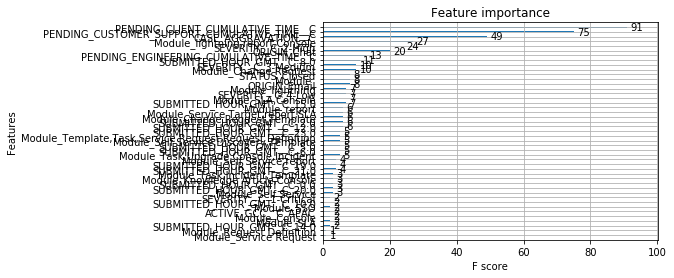

In [445]:
model = XGBClassifier()
model.fit(X_train, Y_train)
# plot feature importance
plot_importance(model)
plt.show()

In [434]:
np.round(rf.feature_importances_,2)

array([0.18, 0.16, 0.2 , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.03, 0.01, 0.01, 0.01, 0.  , 0.04, 0.02, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [435]:
rf.predict_proba(testData)[0][0]

1.0

In [ ]:
X_validation.head()

In [ ]:
import pickle

In [ ]:
filename = 'ClassModel.sav'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)
result = loaded_model.score(X_validation, Y_validation)
print(result)

In [ ]:
prob = loaded_model.predict_proba(testData)[0][0]
prob

In [256]:
randomNum = random.uniform(5, 15)

In [ ]:
if(prob <0.22):
    prob = prob*100 + randomNum
else:
    prob = prob*100 - randomNum

In [ ]:
prob